In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
delivery=df['Delivery Time']
sort=df['Sorting Time']
delivery,sort

(0     21.00
 1     13.50
 2     19.75
 3     24.00
 4     29.00
 5     15.35
 6     19.00
 7      9.50
 8     17.90
 9     18.75
 10    19.83
 11    10.75
 12    16.68
 13    11.50
 14    12.03
 15    14.88
 16    13.75
 17    18.11
 18     8.00
 19    17.83
 20    21.50
 Name: Delivery Time, dtype: float64,
 0     10
 1      4
 2      6
 3      9
 4     10
 5      6
 6      7
 7      3
 8     10
 9      9
 10     8
 11     4
 12     7
 13     3
 14     3
 15     4
 16     6
 17     7
 18     2
 19     7
 20     5
 Name: Sorting Time, dtype: int64)

array([[<Axes: title={'center': 'Delivery Time'}>,
        <Axes: title={'center': 'Sorting Time'}>]], dtype=object)

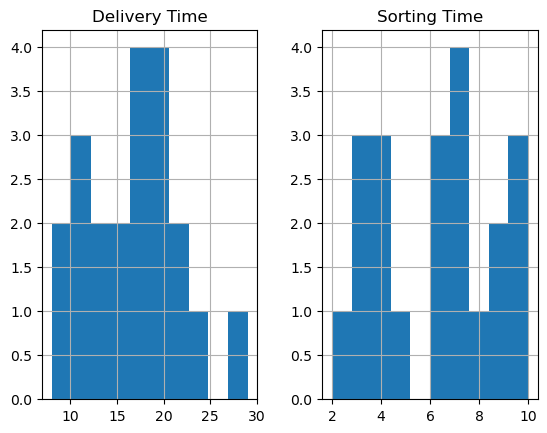

In [8]:
df.hist()

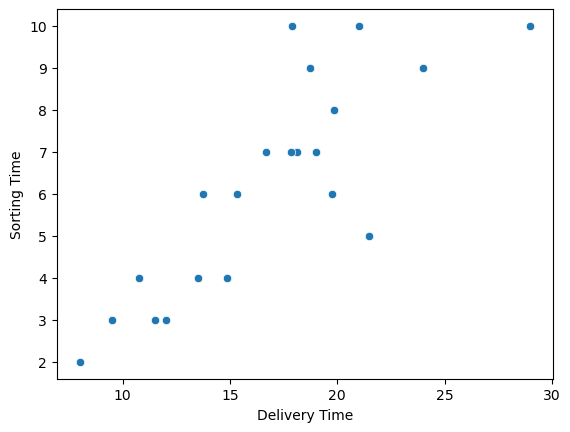

In [9]:
sns.scatterplot(x=delivery,y=sort,data=df)
plt.show()

In [11]:
model = LinearRegression()
x = df[['Delivery Time']]  # Independent variable
y = sort    # Dependent variable
model.fit(x, y)

LinearRegression()

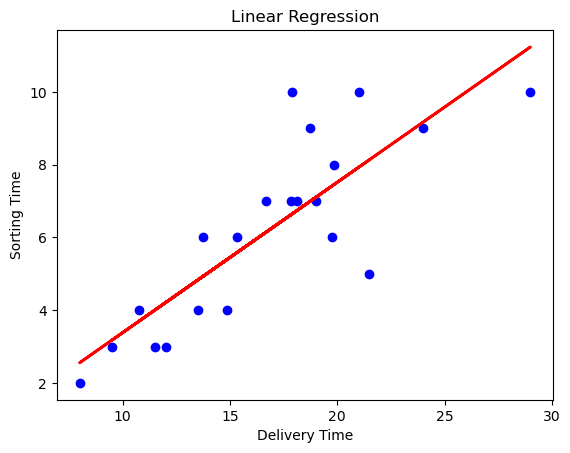

In [12]:
plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(x), color='red', linewidth=2)
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.title('Linear Regression')
plt.show()

In [13]:
df.rename(columns={"Delivery Time": "Delivery_Time"}, inplace=True)
df.rename(columns={"Sorting Time": "Sorting_Time"}, inplace=True)
# Create the linear regression model
model = smf.ols("Sorting_Time~Delivery_Time", data=df).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           3.98e-06
Time:                        15:22:28   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
Delivery_Time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
pred=model.predict(df["Delivery_Time"])

In [16]:
model.resid

0     2.068057
1    -0.828866
2    -1.414763
3    -0.173174
4    -1.241892
5     0.405709
6    -0.104456
7    -0.173891
8     3.350662
9     1.998980
10    0.552137
11    0.308929
12    0.855430
13   -1.001378
14   -1.220662
15   -1.399832
16    1.067698
17    0.263776
18   -0.553276
19    0.379624
20   -3.138815
dtype: float64

In [17]:
rmse=np.sqrt(np.mean((np.array(df["Sorting_Time"])-np.array(pred))**2))
rmse

1.3983430567957227

<Axes: xlabel='Delivery_Time', ylabel='Sorting_Time'>

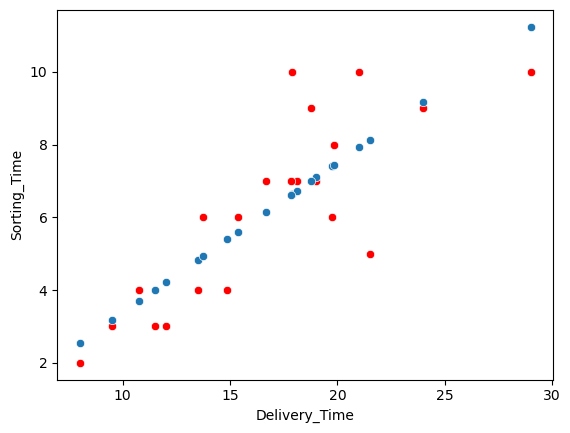

In [18]:
sns.scatterplot(x="Delivery_Time",y="Sorting_Time",data=df,color="red")
sns.scatterplot(x="Delivery_Time",y=pred,data=df)

<Axes: xlabel='Delivery_Time', ylabel='Sorting_Time'>

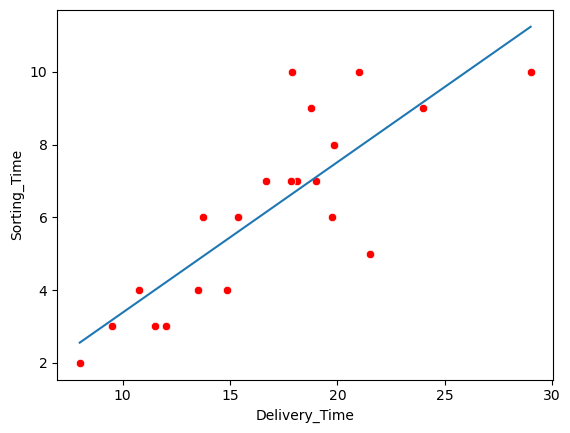

In [19]:
sns.scatterplot(x="Delivery_Time",y="Sorting_Time",data=df,color="red")
sns.lineplot(x="Delivery_Time",y=pred,data=df)

In [20]:
model2=smf.ols("np.log(Sorting_Time)~Delivery_Time",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Wed, 15 Nov 2023   Prob (F-statistic):           2.64e-06
Time:                          15:26:25   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
Delivery_Time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pred2=model2.predict(df["Delivery_Time"])
pred2

0     2.052148
1     1.475394
2     1.956022
3     2.282850
4     2.667352
5     1.617660
6     1.898347
7     1.167792
8     1.813756
9     1.879122
10    1.962174
11    1.263917
12    1.719938
13    1.321593
14    1.362350
15    1.581517
16    1.494619
17    1.829905
18    1.052441
19    1.808373
20    2.090598
dtype: float64

In [22]:
pred2=np.exp(pred2)
pred2

0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64

In [23]:
rmse2=np.sqrt(np.mean((np.array(df["Sorting_Time"])-np.array(pred2))**2))
rmse2

1.7921450016869798

<Axes: xlabel='Delivery_Time', ylabel='Sorting_Time'>

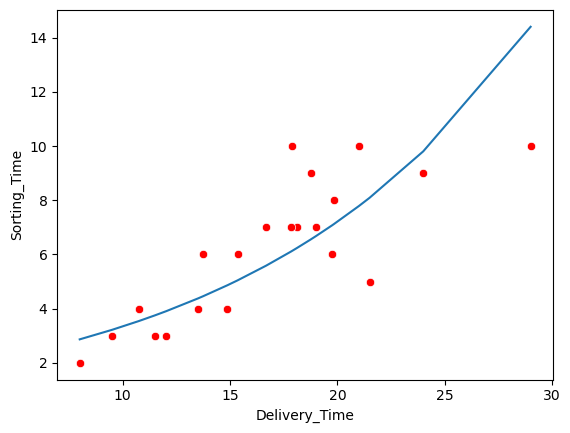

In [24]:
sns.scatterplot(x="Delivery_Time",y="Sorting_Time",data=df,color="red")
sns.lineplot(x="Delivery_Time",y=pred2,data=df)

In [25]:
df["Delivery_Time_sq"]=df["Delivery_Time"]*df["Delivery_Time"]
df.head()

,Delivery_Time,Sorting_Time,Delivery_Time_sq
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000


In [26]:
model3=smf.ols("np.log(Sorting_Time)~Delivery_Time+Delivery_Time_sq",data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.794
Model:                              OLS   Adj. R-squared:                  0.771
Method:                   Least Squares   F-statistic:                     34.62
Date:                  Wed, 15 Nov 2023   Prob (F-statistic):           6.77e-07
Time:                          15:26:29   Log-Likelihood:                 3.2337
No. Observations:                    21   AIC:                           -0.4673
Df Residuals:                        18   BIC:                             2.666
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7780      0.450     -1.730      0.101      -1.723       0.167
Delivery_Time        0.2272      0.052      4.346      0.000       0.117       0.337
Delivery_Time_sq    -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
pred3=model3.predict(df[["Delivery_Time","Delivery_Time_sq"]])

In [28]:
pred3=np.exp(pred3)
pred3

0     8.250905
1     4.531944
2     7.720077
3     9.165723
4     9.206382
5     5.493602
6     7.370749
7     2.705128
8     6.827202
9     7.250110
10    7.756102
11    3.225473
12    6.195767
13    3.561679
14    3.809137
15    5.245998
16    4.659292
17    6.933311
18    2.152041
19    6.791625
20    8.441717
dtype: float64

In [29]:
rmse3=np.sqrt(np.mean((np.array(df["Delivery_Time"])-np.array(pred3))**2))
rmse3

11.132947341929558

<Axes: xlabel='Delivery_Time', ylabel='Sorting_Time'>

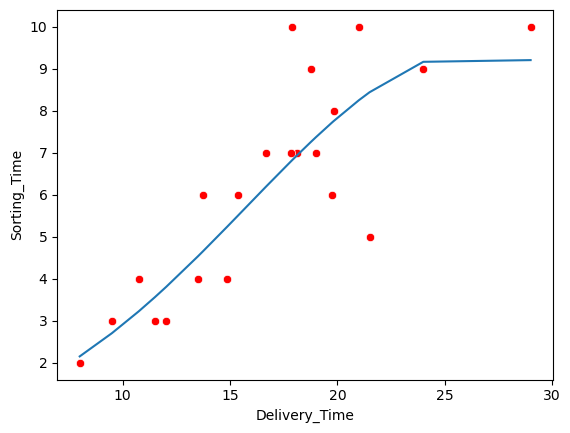

In [30]:
sns.scatterplot(x="Delivery_Time",y="Sorting_Time",data=df,color="red")
sns.lineplot(x="Delivery_Time",y=pred3,data=df)